In [1]:
pip install tensorflow numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 데이터셋 디렉토리 설정
train_dir = '/Users/wayne/Desktop/workstation/jupyter/fruit/data/Training'
test_dir = '/Users/wayne/Desktop/workstation/jupyter/fruit/data/Test'

# 이미지 데이터를 제너레이터를 통해 로드
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(100, 100, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 131)            │        67,203 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,714,563 (25.61 MB)

 Trainable params: 6,714,563 (25.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(train_generator.class_indices)), dtype=tf.float32)
    )
)

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(test_generator.class_indices)), dtype=tf.float32)
    )
)

# 데이터셋 반복 설정
train_dataset = train_dataset.repeat()
test_dataset = test_dataset.repeat()

# steps_per_epoch 및 validation_steps 계산
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# 모델 학습
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=test_dataset,
    validation_steps=validation_steps
)


Epoch 1/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 160s 76ms/step - accuracy: 0.7987 - loss: 0.8540 - val_accuracy: 0.9326 - val_loss: 0.2811
Epoch 2/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 159s 75ms/step - accuracy: 0.9846 - loss: 0.0569 - val_accuracy: 0.9348 - val_loss: 0.2892
Epoch 3/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 159s 75ms/step - accuracy: 0.9931 - loss: 0.0296 - val_accuracy: 0.9676 - val_loss: 0.1736
Epoch 4/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 160s 76ms/step - accuracy: 0.9953 - loss: 0.0188 - val_accuracy: 0.9554 - val_loss: 0.2607
Epoch 5/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 158s 75ms/step - accuracy: 0.9948 - loss: 0.0202 - val_accuracy: 0.9625 - val_loss: 0.2194
Epoch 6/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 160s 75ms/step - accuracy: 0.9974 - loss: 0.0106 - val_accuracy: 0.9575 - val_loss: 0.2716
Epoch 7/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 158s 75ms/step - accuracy: 0.9999 - loss: 5.2380e-04 - val_accuracy: 0.9655 - val_loss: 0.2205
Epoch 8/10
2115/2115 ━━━━━━━━━━━━━━━━━━━━ 158s 75ms/step - accura

In [5]:
loss, accuracy = model.evaluate(test_dataset, steps=validation_steps)
print(f'Test accuracy: {accuracy * 100:.2f}%')

709/709 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.9553 - loss: 0.2393
Test accuracy: 95.55%


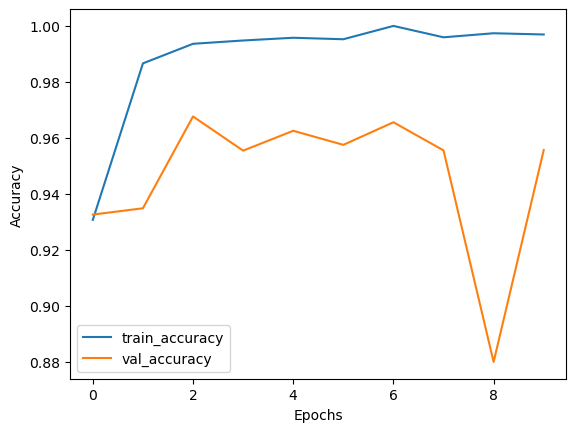

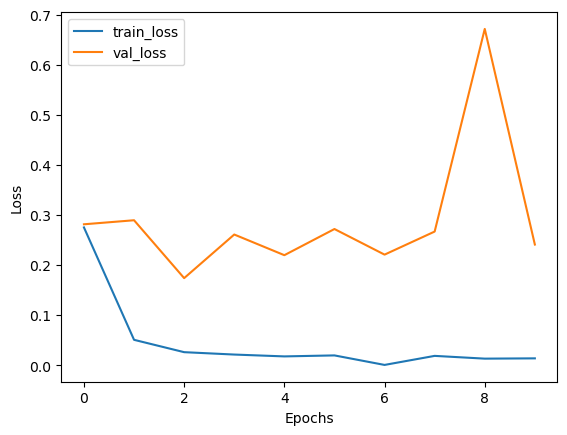

In [6]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
model.save('fruit_classifier_model.keras', include_optimizer=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The image is predicted to be: Banana Red
Prediction probabilities: {'Apple Braeburn': 6.945095e-14, 'Apple Crimson Snow': 1.0993452e-14, 'Apple Golden 1': 3.0314573e-20, 'Apple Golden 2': 6.1028825e-14, 'Apple Golden 3': 1.7710224e-19, 'Apple Granny Smith': 4.2342098e-18, 'Apple Pink Lady': 8.61312e-12, 'Apple Red 1': 8.5575534e-17, 'Apple Red 2': 1.555369e-18, 'Apple Red 3': 5.093326e-18, 'Apple Red Delicious': 4.78859e-18, 'Apple Red Yellow 1': 6.747883e-14, 'Apple Red Yellow 2': 1.5440854e-12, 'Apricot': 1.2501699e-18, 'Avocado': 6.0699274e-17, 'Avocado ripe': 2.375783e-26, 'Banana': 8.177198e-12, 'Banana Lady Finger': 6.3546136e-06, 'Banana Red': 0.9974922, 'Beetroot': 3.0482778e-16, 'Blueberry': 3.830309e-20, 'Cactus fruit': 5.2557325e-16, 'Cantaloupe 1': 1.4409198e-14, 'Cantaloupe 2': 8.735262e-17, 'Carambula': 5.4605917e-14, 'Cauliflower': 5.362422e-15, 'Cherry 1': 6.7929386e-14, 'Cherry 2': 3.7854335e-08, 'Cherry Rainier': 0.00026904204, 'C

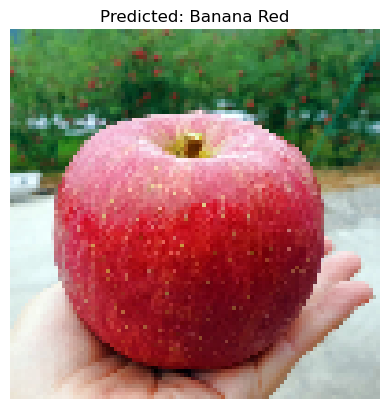

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

# 모델 불러오기
model = tf.keras.models.load_model('fruit_classifier_model.keras')

# 모델 컴파일 (최적화 알고리즘 재설정)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

@tf.function
def predict_image(model, img_array):
    return model(img_array, training=False)

# 새로운 이미지 로드 및 전처리
img_path = 'images/apple_3.jpg'  # 예측할 이미지의 경로
img = image.load_img(img_path, target_size=(100, 100))  # 모델의 입력 크기에 맞게 조정
img_array = image.img_to_array(img) / 255.0  # 스케일 조정
img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가

# 예측 수행
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# 예측 결과 출력
print(f'The image is predicted to be: {predicted_label}')

# 예측된 클래스 확률 출력
predictions_proba = {class_labels[i]: predictions[0][i] for i in range(len(class_labels))}
print(f'Prediction probabilities: {predictions_proba}')

# 이미지 출력
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()

In [17]:
#데이터 증강
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical'
)


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [18]:
# 모델 아키텍처 개선
model = models.Sequential([
    layers.Input(shape=(100, 100, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 131)            │        67,203 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,357,123 (5.18 MB)

 Trainable params: 1,357,123 (5.18 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 사전 훈련된 모델 사용
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(train_generator.class_indices)), dtype=tf.float32)
    )
)

test_dataset = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, len(test_generator.class_indices)), dtype=tf.float32)
    )
)

# 데이터셋 반복 설정
train_dataset = train_dataset.repeat()
test_dataset = test_dataset.repeat()

# steps_per_epoch 및 validation_steps 계산
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# 모델 학습
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=test_dataset,
    validation_steps=validation_steps
)


Epoch 1/30
1368/2115 ━━━━━━━━━━━━━━━━━━━━ 17:34 1s/step - accuracy: 0.0150 - loss: 4.8569